<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/8thWeek/SVM_Food_Calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: **Muhammad Amirul Arsyad Arrayyan**
# NIM: **1103204207**

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/fastfood_calories.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,512,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,513,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,514,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Membaca dataset
# Ganti 'nama_file.csv' dengan nama file CSV yang berisi dataset Anda
nama_file_csv = '/content/gdrive/MyDrive/Dataset/fastfood_calories.csv'
df = pd.read_csv(nama_file_csv)

# Memilih fitur-fitur yang diperlukan
fitur = df[['cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol',
            'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
            'vit_a', 'vit_c', 'calcium']]

# Memilih target (variabel yang ingin diprediksi)
target = df['calories']

# Membagi data menjadi data latih dan data uji
fitur_latih, fitur_uji, target_latih, target_uji = train_test_split(fitur, target, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
fitur_latih_std = scaler.fit_transform(fitur_latih)
fitur_uji_std = scaler.transform(fitur_uji)

# Imputasi nilai NaN menggunakan mean
imputer = SimpleImputer(strategy='mean')
fitur_latih_std_imputed = imputer.fit_transform(fitur_latih_std)
fitur_uji_std_imputed = imputer.transform(fitur_uji_std)

# Membuat model SVR
model_svr = SVR(kernel='linear', C=1.0)

# Melatih model dengan data latih
model_svr.fit(fitur_latih_std_imputed, target_latih)

# Memprediksi target untuk data uji
prediksi_uji = model_svr.predict(fitur_uji_std_imputed)

# Menghitung MSE (Mean Squared Error) sebagai metrik evaluasi
mse = mean_squared_error(target_uji, prediksi_uji)
print(f'Mean Squared Error: {mse}')

# Jika diperlukan, Anda dapat menggunakan model_svr untuk memprediksi nilai untuk data baru
# contoh_prediksi = model_svr.predict(fitur_baru_std)

Mean Squared Error: 260.6372068698792


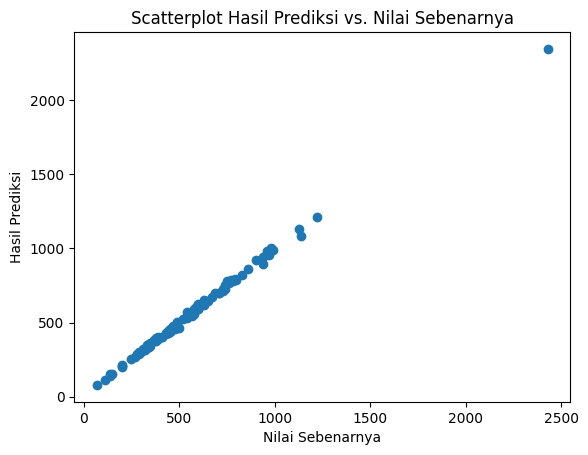

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat scatterplot untuk hasil prediksi vs. nilai sebenarnya
plt.scatter(target_uji, prediksi_uji)
plt.title('Scatterplot Hasil Prediksi vs. Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Hasil Prediksi')
plt.show()

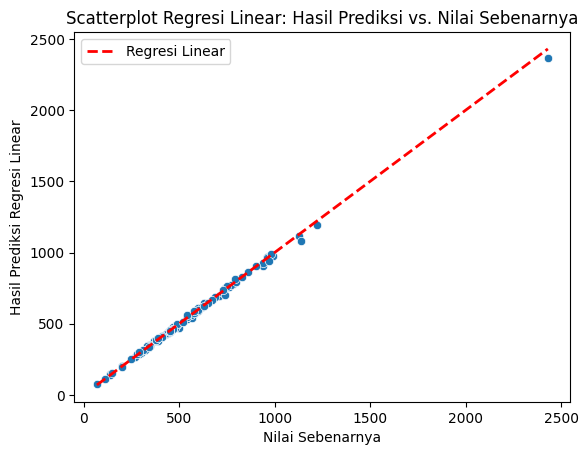

In [16]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model_regresi_linear = LinearRegression()

# Melatih model dengan data latih
model_regresi_linear.fit(fitur_latih_std_imputed, target_latih)

# Memprediksi target untuk data uji
prediksi_uji_regresi = model_regresi_linear.predict(fitur_uji_std_imputed)

# Membuat DataFrame untuk hasil prediksi dan nilai sebenarnya
df_prediksi = pd.DataFrame({'Sebenarnya': target_uji, 'Prediksi': prediksi_uji_regresi})

# Membuat scatterplot untuk hasil prediksi vs. nilai sebenarnya
sns.scatterplot(data=df_prediksi, x='Sebenarnya', y='Prediksi')
plt.plot([df_prediksi.min().min(), df_prediksi.max().max()], [df_prediksi.min().min(), df_prediksi.max().max()], color='red', linestyle='--', linewidth=2, label='Regresi Linear')
plt.title('Scatterplot Regresi Linear: Hasil Prediksi vs. Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Hasil Prediksi Regresi Linear')
plt.legend()
plt.show()